In [1]:
import pandas as pd
import os

## Code to get data from one file

In [2]:
def extract_data(filepath): 
#Extract the data from a single simulation output 
    # print(filepath)
    data=pd.read_excel(filepath, skiprows=[0,1,2], index_col=0) #skip the first 3 rows of the file, set the first column as the index column
     

    # drop first three columns 
    # these are the empty "format" column, the units column, and the initial configuration, which we don't care about
    # (remember the original first column is the index column now, so it doesn't get dropped)
    data.drop(data.columns[0:3], axis=1, inplace=True) 
    
    data = data.transpose() #transpose the data so that the columns are the variables and the rows are the data points
    return data 


## Code to loop over folder and concatenate data (untested)

In [3]:
filepath = "C:/Users/ankur/OneDrive/Documents/Solidworks Config generations and Results 50%/50% final results" #path to the folder containing the files
filenames = os.listdir(filepath)
all_data = [] #list to store the data from all the files
for f in filenames:
    if f.endswith(".xlsx"):
        print(f"Loading file: {f}")
        data = extract_data(f"{filepath}/{f}") #format the exact path using the folder path + / + the file name
        all_data.append(data) #append the data to the list of all data
all_data = pd.concat(all_data, axis = 0) #concatenate all the data into a single dataframe

all_data.index = range(len(all_data)) #rename indices to avoid issues with duplicates
all_data



Loading file: 1-400 results newfile.xlsx
Loading file: 1401-2000 results newfile.xlsx
Loading file: 2001-2500 results newfile.xlsx
Loading file: 2501-3500 results newfile.xlsx
Loading file: 3501-3700 results newfile.xlsx
Loading file: 3701-4000 results newfile.xlsx
Loading file: 4001-4200 results newfile.xlsx
Loading file: 401-1400 results newfile.xlsx
Loading file: 4200-4700 results newfile.xlsx
Loading file: 4701-5000 results newfile.xlsx


,triangle,small ellipse,big ellipse,circle,back cut length,corner,triangle to small ellipse,circle x,circle y,Mass2,Stress2,Displacement3
0,59.39160,16.34668,22.87477,13.56152,56.73219,39.37897,16.33808,85.87876,11.34289,127.63,14.88,-1.373
1,35.23211,26.18333,27.66177,15.24632,29.87560,45.07896,29.47574,68.14849,13.02467,134.54,17.34,-1.338
2,26.48883,23.32933,37.02466,14.89976,38.91530,32.00901,23.92489,82.37679,14.61354,135.87,16.89,-1.301
3,33.54176,29.35971,40.09899,8.38806,64.62975,48.54654,31.55843,65.27285,18.88546,118.05,15.95,-1.385
4,65.02282,31.31793,46.85201,13.97863,30.97744,39.30506,30.17221,78.77987,13.21986,121.07,17.51,-1.524
...,...,...,...,...,...,...,...,...,...,...,...,...
5003,39.07497,13.83198,32.62862,11.02838,66.67895,51.27398,23.89607,66.43648,15.69311,119.31,16.56,-1.371
5004,32.34590,23.22570,25.87489,10.96513,40.28090,47.29294,21.00310,78.00764,11.41261,132.55,17.68,-1.293
5005,60.61776,23.05316,25.53504,12.74924,71.39482,49.13145,18.80726,79.55240,17.41671,115.79,18.66,-1.470
5006,58.62693,19.13819,47.56205,9.24262,29.84110,30.99861,25.57112,75.62581,13.39225,129.54,17.87,-1.387


In [4]:
XD = all_data[['triangle', 'small ellipse', 'big ellipse', 'circle',	'back cut length',	'corner',	'triangle to small ellipse',	'circle x',	'circle y']]  # multiple features
yD = all_data['Mass2']
yD

0       127.63
1       134.54
2       135.87
3       118.05
4       121.07
         ...  
5003    119.31
5004    132.55
5005    115.79
5006    129.54
5007    126.14
Name: Mass2, Length: 5008, dtype: float64

In [5]:
# creating train and test sets 
from sklearn.model_selection import train_test_split
XD_train, XD_test, yD_train, yD_test = train_test_split( 
    XD, yD, test_size=0.3, random_state=4294967295) 

In [6]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

pipeD = Pipeline([('polyfeatures', PolynomialFeatures(degree=3)), ('linear', LinearRegression())])
cross_val_score(pipeD, XD_train, yD_train, cv=10)

array([0.99932689, 0.99933885, 0.99935594, 0.99938463, 0.99926892,
       0.99909017, 0.99923272, 0.99941563, 0.99939472, 0.99926583])

In [8]:
pipeD.fit(XD_train, yD_train)

Pipeline(steps=[('polyfeatures', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression())])

In [9]:
y_predPipeD = pipeD.predict(XD_test) 
y_predPipeD

array([111.03938263, 109.37572951, 125.43858755, ..., 122.53931288,
       130.63966512, 122.25101118])

R-squared: 1.00


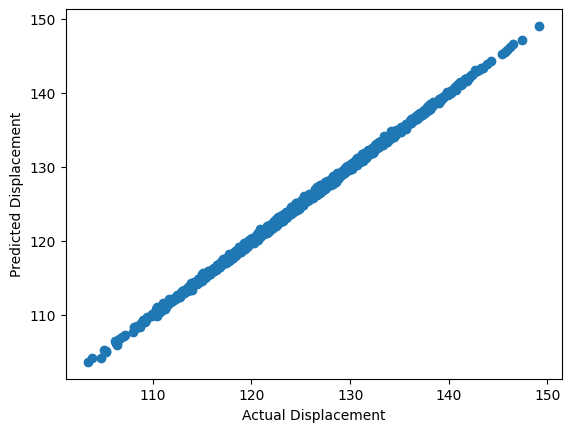

In [10]:
plt.scatter (yD_test, y_predPipeD)
plt.xlabel("Actual Displacement")
plt.ylabel("Predicted Displacement")
r2 = r2_score(yD_test, y_predPipeD)
print(f'R-squared: {r2:.2f}')

In [14]:
from sklearn.neighbors import KNeighborsRegressor

In [15]:
from sklearn.model_selection import GridSearchCV
# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 'weights': ['uniform','distance'],'p':[1,2,5]}]

# Search for best hyperparameters
KNN2 = GridSearchCV(estimator=KNeighborsRegressor(), 
                      param_grid=hp_candidates, 
                      cv=5,
                      verbose=1,  
                      scoring='r2', 
                      return_train_score=True)
KNN2.fit(XD_train, yD_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15],
                          'p': [1, 2, 5], 'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='r2', verbose=1)

In [15]:
KNN.best_params_

{'n_neighbors': 12, 'p': 1, 'weights': 'distance'}

In [18]:
KNN = KNeighborsRegressor(n_neighbors = 12, p = 1, weights = "distance")
KNN.fit(XD_train, yD_train)

KNeighborsRegressor(n_neighbors=12, p=1, weights='distance')

In [16]:
y_predKNN2 = KNN2.predict(XD_test) 

R-squared: 0.96


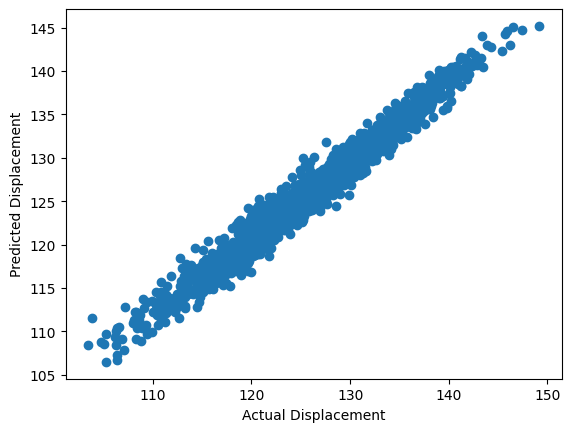

In [17]:
plt.scatter (yD_test, y_predKNN2)
plt.xlabel("Actual Displacement")
plt.ylabel("Predicted Displacement")
r2 = r2_score(yD_test, y_predKNN2)
print(f'R-squared: {r2:.2f}')

In [18]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=30)
param_grid = { "n_estimators"      : [250, 300],
           "max_features"      : [3, 5],
           "max_depth"         : [10, 20],
           "min_samples_split" : [2, 4] ,
           "bootstrap": [True, False]}
randF = GridSearchCV(estimator = model, param_grid=param_grid, n_jobs=-1, cv=5, scoring = 'r2')
randF.fit(XD_train, yD_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=30), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20],
                         'max_features': [3, 5], 'min_samples_split': [2, 4],
                         'n_estimators': [250, 300]},
             scoring='r2')

In [19]:
randF.best_score_

0.9670250583687308

In [20]:
y_predrandF = randF.predict(XD_test) 

R-squared: 0.97


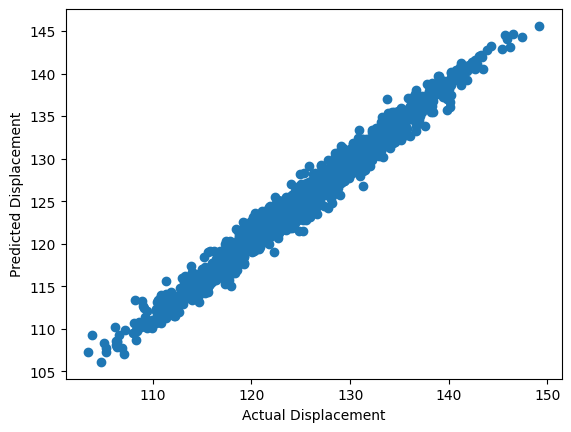

In [21]:
plt.scatter (yD_test, y_predrandF)
plt.xlabel("Actual Displacement")
plt.ylabel("Predicted Displacement")
r2 = r2_score(yD_test, y_predrandF)
print(f'R-squared: {r2:.2f}')

In [22]:
from sklearn.neural_network import MLPRegressor

In [23]:
# Fitting a Regression model to the train data

param_list = {"hidden_layer_sizes": [1,50], "activation": ["identity", "logistic", "tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.0005]}
MLP = GridSearchCV(
    estimator=MLPRegressor(max_iter=10000, n_iter_no_change=30),
    param_grid=param_list,
    n_jobs=-1,
    cv=5,
    verbose=5,
    scoring ='r2')
MLP.fit(XD_train, yD_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\ankur\OneDrive\Documents\To_PO\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
20 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ankur\OneDrive\Documents\To_PO\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ankur\OneDrive\Documents\To_PO\.venv\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ankur\OneDrive\Documents\To_PO\.venv\L

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=10000, n_iter_no_change=30),
             n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [5e-05, 0.0005],
                         'hidden_layer_sizes': [1, 50],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='r2', verbose=5)

In [24]:
MLP.best_score_

0.9940593399709969

In [25]:
y_predMLP = MLP.predict(XD_test) 

R-squared: 0.99


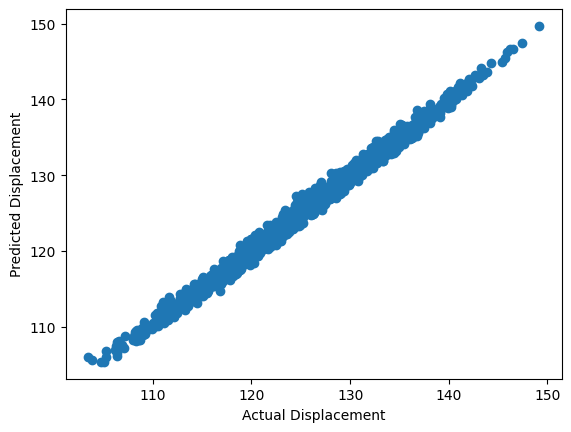

In [26]:
plt.scatter (yD_test, y_predMLP)
plt.xlabel("Actual Displacement")
plt.ylabel("Predicted Displacement")
r2 = r2_score(yD_test, y_predMLP)
print(f'R-squared: {r2:.2f}')

In [27]:

## importing class from library
from sklearn.tree import DecisionTreeRegressor

## Setting optimum values for parameters.
param_grid = {
    'max_depth': [1, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

## creating instance
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring = 'r2')

## fitting data 
# grid_search.fit(x, y)

grid_search.fit(XD_train, yD_train)

## getting best parameters 
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [28]:
DTR = DecisionTreeRegressor(max_depth = 10, min_samples_split = 10, min_samples_leaf = 4)

In [29]:
DTR.fit(XD_train, yD_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10)

In [30]:
y_predDTR = DTR.predict(XD_test) 

R-squared: 0.90


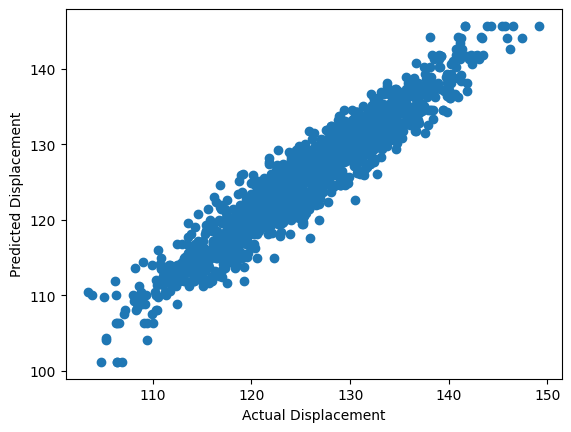

In [31]:
plt.scatter (yD_test, y_predDTR)
plt.xlabel("Actual Displacement")
plt.ylabel("Predicted Displacement")
r2 = r2_score(yD_test, y_predDTR)
print(f'R-squared: {r2:.2f}')